Q2. Perform the following preprocessing tasks on the dirty_iris datasetii.
i) Calculate the number and percentage of observations that are complete.
ii) Replace all the special values in data with NA.
iii) Define these rules in a separate text file and read them.
(Use editfile function in R (package editrules). Use similar function in Python).
Print the resulting constraint object.
– Species should be one of the following values: setosa, versicolor or virginica.
– All measured numerical properties of an iris should be positive.
– The petal length of an iris is at least 2 times its petal width.
– The sepal length of an iris cannot exceed 30 cm.
– The sepals of an iris are longer than its petals.
iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the
result.
v) Find outliers in sepal length using boxplot and boxplot.stats

In [1]:
import pandas as pd
import numpy as np

In [15]:
df=pd.read_csv(r"C:\Users\CSLab\Desktop\YashVishnoi DM Pracs\dirty_iris.csv")
df

SepalLength  SepalWidth  PetalLength  PetalWidth     Species
0            6.4         3.2          4.5         1.5  versicolor
1            6.3         3.3          6.0         2.5   virginica
2            6.2         NaN          5.4         2.3   virginica
3            5.0         3.4          1.6         0.4      setosa
4            5.7         2.6          3.5         1.0  versicolor
..           ...         ...          ...         ...         ...
145          6.7         3.1          5.6         2.4   virginica
146          5.6         3.0          4.5         1.5  versicolor
147          5.2         3.5          1.5         0.2      setosa
148          6.4         3.1          NaN         1.8   virginica
149          5.8         2.6          4.0         NaN  versicolor

[150 rows x 5 columns]

In [16]:
complete_data=df.dropna(thresh=5)
complete_data

SepalLength  SepalWidth  PetalLength  PetalWidth     Species
0            6.4         3.2          4.5         1.5  versicolor
1            6.3         3.3          6.0         2.5   virginica
3            5.0         3.4          1.6         0.4      setosa
4            5.7         2.6          3.5         1.0  versicolor
7            5.9         3.0          5.1         1.8   virginica
..           ...         ...          ...         ...         ...
143          6.3         2.9          5.6         1.8   virginica
144          5.7         2.5          5.0         2.0   virginica
145          6.7         3.1          5.6         2.4   virginica
146          5.6         3.0          4.5         1.5  versicolor
147          5.2         3.5          1.5         0.2      setosa

[96 rows x 5 columns]

In [17]:
complete_data.shape

(96, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  140 non-null    float64
 1   SepalWidth   133 non-null    float64
 2   PetalLength  131 non-null    float64
 3   PetalWidth   138 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.isna()

SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          False       False        False       False    False
1          False       False        False       False    False
2          False        True        False       False    False
3          False       False        False       False    False
4          False       False        False       False    False
..           ...         ...          ...         ...      ...
145        False       False        False       False    False
146        False       False        False       False    False
147        False       False        False       False    False
148        False       False         True       False    False
149        False       False        False        True    False

[150 rows x 5 columns]

In [20]:
df.isna().sum()

SepalLength    10
SepalWidth     17
PetalLength    19
PetalWidth     12
Species         0
dtype: int64

In [21]:
poc=len(complete_data)/len(df)*100
poc

64.0

In [62]:
complete_data.shape

(96, 5)

In [61]:
df.replace(["?","N/A"," ","inf"], np.nan)

SepalLength  SepalWidth  PetalLength  PetalWidth     Species
0            6.4         3.2          4.5         1.5  versicolor
1            6.3         3.3          6.0         2.5   virginica
2            6.2         NaN          5.4         2.3   virginica
3            5.0         3.4          1.6         0.4      setosa
4            5.7         2.6          3.5         1.0  versicolor
..           ...         ...          ...         ...         ...
145          6.7         3.1          5.6         2.4   virginica
146          5.6         3.0          4.5         1.5  versicolor
147          5.2         3.5          1.5         0.2      setosa
148          6.4         3.1          NaN         1.8   virginica
149          5.8         2.6          4.0         NaN  versicolor

[150 rows x 5 columns]

In [40]:
R1=df["Species"].apply(lambda x: True if x=="setosa" or x=="versicolor" or x=="virginica" else False)
R1

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: Species, Length: 150, dtype: bool

In [28]:
R2=df.apply(lambda x: True if x.SepalLength>0 or x.SepalWidth>0 or x.PetalLength>0 or x.PetalWidth>0 else False, axis=1)
R2

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Length: 150, dtype: bool

In [26]:
R3=df.apply(lambda x: True if x.PetalLength>=2*x.PetalWidth else False, axis=1)
R3

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149    False
Length: 150, dtype: bool

In [27]:
R4=df["SepalLength"].apply(lambda x: True if x<=30 else False)
R4

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: SepalLength, Length: 150, dtype: bool

In [29]:
R5=df.apply(lambda x: True if x.SepalLength>x.PetalLength else False, axis=1)
R5

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

In [41]:
RuleCheck = pd.DataFrame({"Rule1":R1,"Rule2":R2,"Rule3":R3,"Rule4":R4, "Rule5":R5})
RuleCheck

Rule1  Rule2  Rule3  Rule4  Rule5
0     True   True   True   True   True
1     True   True   True   True   True
2     True   True   True   True   True
3     True   True   True   True   True
4     True   True   True   True   True
..     ...    ...    ...    ...    ...
145   True   True   True   True   True
146   True   True   True   True   True
147   True   True   True   True   True
148   True   True  False   True  False
149   True   True  False   True   True

[150 rows x 5 columns]

In [42]:
RuleCheck.astype(int).describe()

Rule1  Rule2       Rule3       Rule4      Rule5
count  150.0  150.0  150.000000  150.000000  150.00000
mean     1.0    1.0    0.773333    0.920000    0.80000
std      0.0    0.0    0.420078    0.272202    0.40134
min      1.0    1.0    0.000000    0.000000    0.00000
25%      1.0    1.0    1.000000    1.000000    1.00000
50%      1.0    1.0    1.000000    1.000000    1.00000
75%      1.0    1.0    1.000000    1.000000    1.00000
max      1.0    1.0    1.000000    1.000000    1.00000

In [43]:
print("number of times first rule violated : ",len(RuleCheck)-RuleCheck["Rule1"].sum())

number of times first rule violated :  0


In [33]:
print("number of times first rule violated : ",len(RuleCheck)-RuleCheck["Rule2"].sum())

number of times first rule violated :  0


In [34]:
print("number of times first rule violated : ",len(RuleCheck)-RuleCheck["Rule3"].sum())

number of times first rule violated :  34


In [35]:
print("number of times first rule violated : ",len(RuleCheck)-RuleCheck["Rule4"].sum())

number of times first rule violated :  12


In [36]:
print("number of times first rule violated : ",len(RuleCheck)-RuleCheck["Rule5"].sum())

number of times first rule violated :  30


In [44]:
RuleCheck.describe()

Rule1 Rule2 Rule3 Rule4 Rule5
count    150   150   150   150   150
unique     1     1     2     2     2
top     True  True  True  True  True
freq     150   150   116   138   120

In [46]:
import matplotlib.pyplot as plt

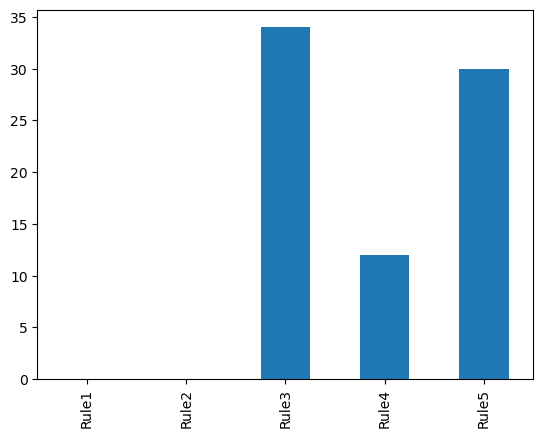

In [47]:
plt.figure()
RuleCheck.apply(lambda x:len(x)-x.sum()).plot(kind='bar')
plt.xlabel="Rules"
plt.ylabel="Number of records that violates the Rules"

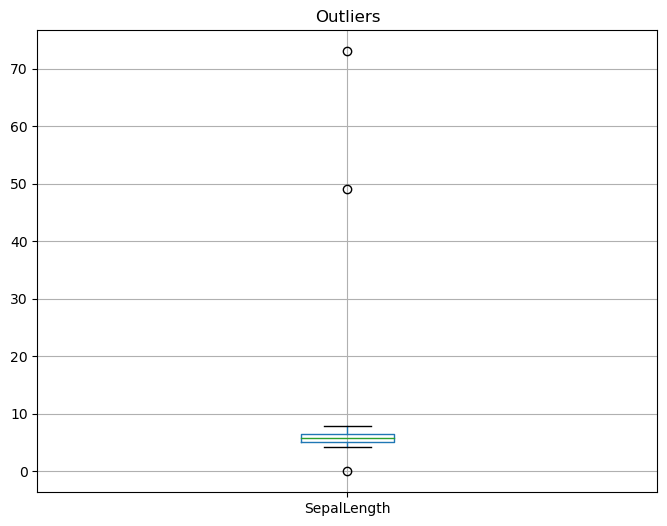

In [59]:
plt.figure(figsize =(8,6))
df.boxplot(column="SepalLength")
plt.title("Outliers")
plt.show()

In [60]:
df["SepalLength"].describe()

count    140.000000
mean       6.559286
std        6.800940
min        0.000000
25%        5.100000
50%        5.750000
75%        6.400000
max       73.000000
Name: SepalLength, dtype: float64

In [63]:
df["SepalLength"].unique

<bound method Series.unique of 0      6.4
1      6.3
2      6.2
3      5.0
4      5.7
      ... 
145    6.7
146    5.6
147    5.2
148    6.4
149    5.8
Name: SepalLength, Length: 150, dtype: float64>